<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/2.%20Machine%20Learning/Semana%203%20-%20Classification%20Models/12.Clasificacion_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

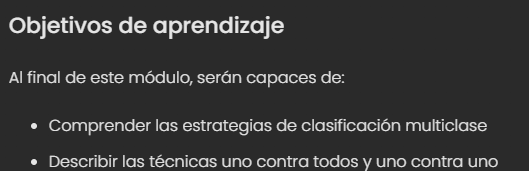

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

##Carguen el conjunto de datos (pequeña tarea)

Los datos ( [que pueden descargar aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)) son los resultados de un análisis químico de vinos producidos en la misma región en Italia, pero derivados de tres cultivares diferentes (tres clases distintas). El análisis determinó las cantidades de 13 componentes encontrados en cada uno de los tres tipos de vinos. Con el conjunto de datos es posible que tengan que convertirlo de un archivo wine.data a un CSV o pueden intentar cargar el archivo .data. 

In [3]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
### Figure this out!
df = pd.read_csv('/content/drive/MyDrive/Data CodingDojo/wine.data', header = None,names = col_names)
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Estrategias de clasificación multiclase

Si bien la regresión logística no es el único algoritmo pensado originalmente para la clasificación binaria (perceptrones y máquinas de vectores de apoyo), es una debilidad conocida del algoritmo. Si bien hay formas de ampliar la regresión logística a los problemas multiclases (más de dos clases), esta sección trata las formas generales para ampliar los algoritmos de clasificación binaria al multiclase.

###Los dos enfoques que se tratan son los siguientes:

* La estrategia uno contra todos divide una clasificación multiclase en un problema de clasificación binaria por clase.
* La estrategia uno contra uno divide una clasificación multiclase en un problema de clasificación binaria por cada par de clases.

##Ejemplo teórico de uno contra todos

Por ejemplo, un problema de clasificación multiclase con ejemplos de cada clase “setosa”, “versicolor” y “virginica”. Esto se puede dividir en tres conjuntos de datos de clasificación binaria como lo siguiente:

* Problema 1 de clasificación binaria: setosa vs. [versicolor, virginica]
* Problema 2 de clasificación binaria: versicolor vs. [setosa, virginica]
* Problema 3 de clasificación binaria: virginica vs. [setosa, versicolor]

Este enfoque requiere que cada modelo prediga una probabilidad de pertenencia a una clase o una puntuación similar a la probabilidad. El argmax de estas puntuaciones (índice de clase con la mayor puntuación) se utiliza para predecir una clase.

Este enfoque se suele usar para algoritmos que naturalmente predicen una probabilidad numérica de pertenencia a una clase o puntuación, como la regresión logística.

Por lo tanto, la implementación de estos algoritmos en las bibliotecas scikit-learn implementa la estrategia uno contra todos por defecto cuando se usan los algoritmos para la clasificación multiclase. La biblioteca scikit-learn también proporciona una clase OneVsRestClassifier separada que permita la estrategia uno contra todos para que use con cualquier clasificador.

##**Ejemplo programación uno contra todos**

In [4]:
# Print out how many classes
print('Class labels', np.unique(df['Class label']))

Class labels [1 2 3]


In [5]:
# Classes aren't balanced.
df['Class label'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class label, dtype: int64

In [6]:
# Arrange data into features matrix and target vector
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [7]:
# In statistical surveys, 
# when subpopulations within an overall population vary,
# it could be advantageous to sample each subpopulation (stratum) independently. 
# Stratification is the process of dividing members of the population into homogeneous subgroups before sampling.
#help(train_test_split)

In [8]:
# Split into training and test sets 
# Providing the class label array y as an argument to stratify ensures both
# the training set and test datasets have the same class proportions as the
# original dataset
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

In [19]:
# Otra forma de verlo es
np.unique(y_train, return_counts = True)

(array([1, 2, 3]), array([41, 50, 33]))

In [12]:
# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


Tanto las exactitudes de entrenamiento y de prueba (ambos al 100 por ciento) indican que nuestro modelo hace un trabajo perfecto en ambos conjuntos de datos. Cuando se aceptan los términos de intercepción a través del atributo “log_reg.intercept_”, vemos que el array devuelve tres valores.

In [14]:
log_reg.intercept_

array([-1.26359485, -1.2159835 , -2.37036399])

Puesto que ajustamos el objeto de regresión logística en un conjunto de datos multiclase a través de un enfoque uno contra todos, la primera intercepción pertenece al modelo que ajusta la clase 1 contra las clases 2 y 3, el segundo valor es la intercepción del modelo que ajusta la clase 2 contra las clases 1 y 3, y el tercer valor es la intercepción del modelo que ajusta la clase 3 contra 1 y 2.

In [15]:
log_reg.coef_

array([[ 1.24630153,  0.18002886,  0.74636768, -1.16415522,  0.        ,
         0.        ,  1.15828968,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55820876,  2.50858734],
       [-1.53732029, -0.38710197, -0.99519347,  0.36468977, -0.059517  ,
         0.        ,  0.66804604,  0.        ,  0.        , -1.9339139 ,
         1.23418066,  0.        , -2.2324885 ],
       [ 0.1356344 ,  0.16848406,  0.3572293 ,  0.        ,  0.        ,
         0.        , -2.43796005,  0.        ,  0.        ,  1.56382951,
        -0.81856764, -0.49250089,  0.        ]])

El array de ponderación a la que se accede mediante el atributo log_reg.coef_ que contiene tres filas de coeficientes de ponderación y un vector de ponderación para cada clase. Cada fila consiste en 13 ponderaciones, donde cada ponderación se multiplica por la característica respectiva en el conjunto de datos de vino de 13 dimensiones para calcular la entrada neta.

##**Cómo funcionan las predicciones**

Scikit-learn emitirá probabilidades para cada clase. La probabilidad más alta será la predicción de clase. Por lo tanto, si se tiene tres clases, scikit-learn emitirá tres probabilidades para el método predict_prob. Si tienen cuatro clases, scikit-learn emitirá 4 probabilidades. En este caso, tenemos tres clases para que el resultado nos de tres probabilidades. Elegimos la clase con la probabilidad más alta.

In [16]:
# La primera clase es la puntuación más alta, por lo que será la predicción 0 (la primera clase) para estos datos
log_reg.predict_proba(X_test[0:1])

array([[9.76605335e-01, 4.47601118e-04, 2.29470644e-02]])

In [17]:
#Podemos obtener la clase asociada con la probabilidad más alta también
log_reg.predict(X_test[0:1])

array([1])

##Ejemplo teórico de uno contra uno

Este enfoque se usó para las máquinas de vectores de soporte (SVM) y los algoritmos relacionados basados en kernel, lo que no se trata en este curso. Esto se debe a que el rendimiento de los métodos de kernel no escala en proporción con el tamaño del conjunto de datos de entrenamiento y el uso de subconjuntos de los datos de entrenamiento puede contrarrestar este efecto.

Uno contra uno (OvO para abreviar) es otro método heurístico para usar algoritmos de clasificación binaria para la clasificación multiclase.

Como la estrategia uno contra todos, uno contra uno divide un conjunto de datos de clasificación multiclase en problemas de clasificación binaria. Al contrario del uno contra todos, lo divide en un conjunto de datos binario para cada clase, el enfoque uno contra uno divide el conjunto de datos en un conjunto de datos para cada clase frente a todas las demás.

Por ejemplo, un problema de clasificación multiclase con ejemplos de cada clase “setosa”, “versicolor” y “virginica”. Esto se puede dividir en tres conjuntos de datos de clasificación binaria como lo siguiente:

* Problema 1 de clasificación binaria: setosa vs. versicolor
* Problema 2 de clasificación binaria: versicolor vs. virginica
* Problema 3 de clasificación binaria: setosa vs. virginica

Todo esto no debe verse muy distinto al uno contra todos, pero este método tiene una complejidad O(n_classes^2), lo que significa que es más lento de funcionar. Cuando se tienen n_classes, se necesitará ajustar n_classes * (n_classes - 1) / 2 clasificadores.

A continuación, se presenta un ejemplo para mostrar lo descontrolado que puede resultar este proceso. Imaginen que tienen 10 clases con los dígitos 0-9. Esto significa que tendremos que entrenar 45 clasificadores separados. Entrenar un modelo puede tomar tiempo (según el modelo y de la cantidad de datos), pero entrenar 45 separados toma mucho tiempo.

(NumClasses * (NumClasses – 1)) / 2
(10 * (10 – 1)) / 2
(10 * 9) / 2
90 / 2
45

# Lecturas opcionales

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html